<a href="https://colab.research.google.com/github/Oguzhanyldrmm/Mnist_w_Tensorflow/blob/main/mnist_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid



#Loading Dataset

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


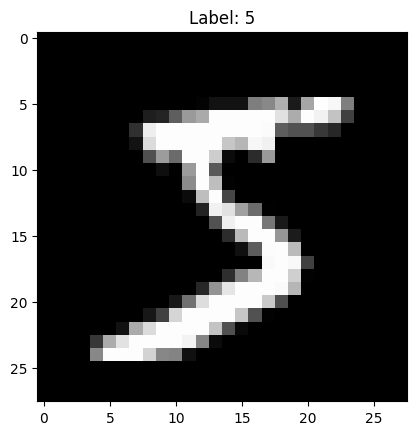

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(x_train[0], cmap="gray")
plt.title("Label: " + str(y_train[0]))
plt.show()


#Visualize Examples

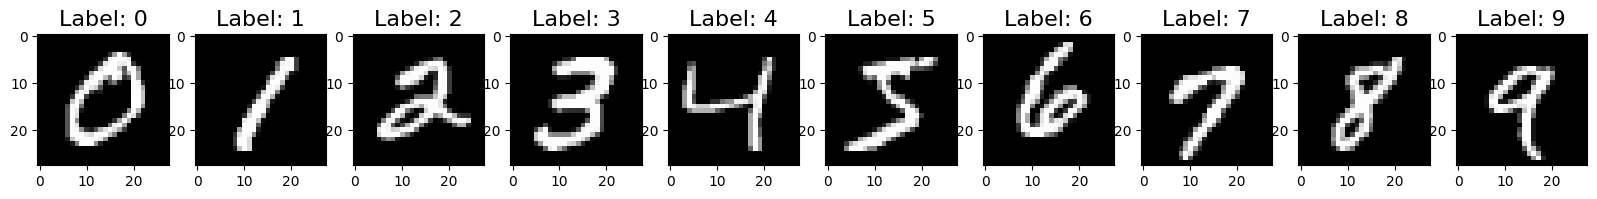

In [ ]:

num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title(f"Label: {i}", fontsize=16)

#Reshape Data

In [ ]:
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(60000, 784)

#Data Scaling

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


#Create Model

In [ ]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = Sequential([
    tf.keras.Input(shape=(784,)),
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=10, activation='linear' )
])

In [ ]:
#loss
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),loss=SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


#Train Model

In [ ]:
model.fit(x_train,y_train,epochs=20, batch_size=128)

Epoch 1/20
469/469 [==============================] - 5s 4ms/step - loss: 0.9722 - accuracy: 0.7394
Epoch 2/20
469/469 [==============================] - 2s 3ms/step - loss: 0.3636 - accuracy: 0.8964
Epoch 3/20
469/469 [==============================] - 2s 3ms/step - loss: 0.2934 - accuracy: 0.9144
Epoch 4/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2569 - accuracy: 0.9244
Epoch 5/20
469/469 [==============================] - 1s 3ms/step - loss: 0.2320 - accuracy: 0.9316
Epoch 6/20
469/469 [==============================] - 2s 5ms/step - loss: 0.2132 - accuracy: 0.9367
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1993 - accuracy: 0.9409
Epoch 8/20
469/469 [==============================] - 2s 5ms/step - loss: 0.1867 - accuracy: 0.9445
Epoch 9/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1773 - accuracy: 0.9480
Epoch 10/20
469/469 [==============================] - 2s 3ms/step - loss: 0.1684 - accuracy: 0.9502

#Evaluate


In [ ]:
test_loss,test_acc = model.evaluate(x_test,y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1380 - accuracy: 0.9572
Test Loss: 0.13802289962768555, Test Accuracy: 0.9571999907493591


#Prediction

In [ ]:
import numpy as np
prediction = model.predict(x_test)


print(f" predicting : \n{prediction[0]}")
print(f" Largest Prediction index: {np.argmax(prediction[0])}")

313/313 [==============================] - 1s 1ms/step
 predicting : 
[ -6.823041    -6.5674033    3.6859772    7.3035827   -8.378302
  -5.0412145  -22.901743    11.234294    -3.0589182    0.81964624]
 Largest Prediction index: 7


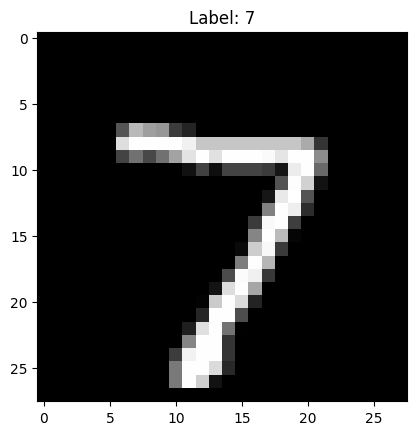

In [ ]:
plt.imshow(x_test[0].reshape(28,28), cmap="gray" )
plt.title("Label: " + str(y_test[0]))
plt.show()

 If the problem only requires a selection, that is sufficient. Use NumPy argmax to select it. If the problem requires a probability, a softmax is required

In [ ]:
prediction_p = tf.nn.softmax(prediction[0])

print(f"Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

Probability vector: 
[1.4096753e-08 1.8202932e-08 5.1656814e-04 1.9241273e-02 2.9763114e-09
 8.3744503e-08 1.4663173e-15 9.8021197e-01 6.0793474e-07 2.9396513e-05]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy argmax function.

In [ ]:
yhat = np.argmax(prediction_p)

print(f"np.argmax(prediction_p): {yhat}")

np.argmax(prediction_p): 7


#Confusion Matrix

Confusion matrix compares predicted values and true values with numerical visulation

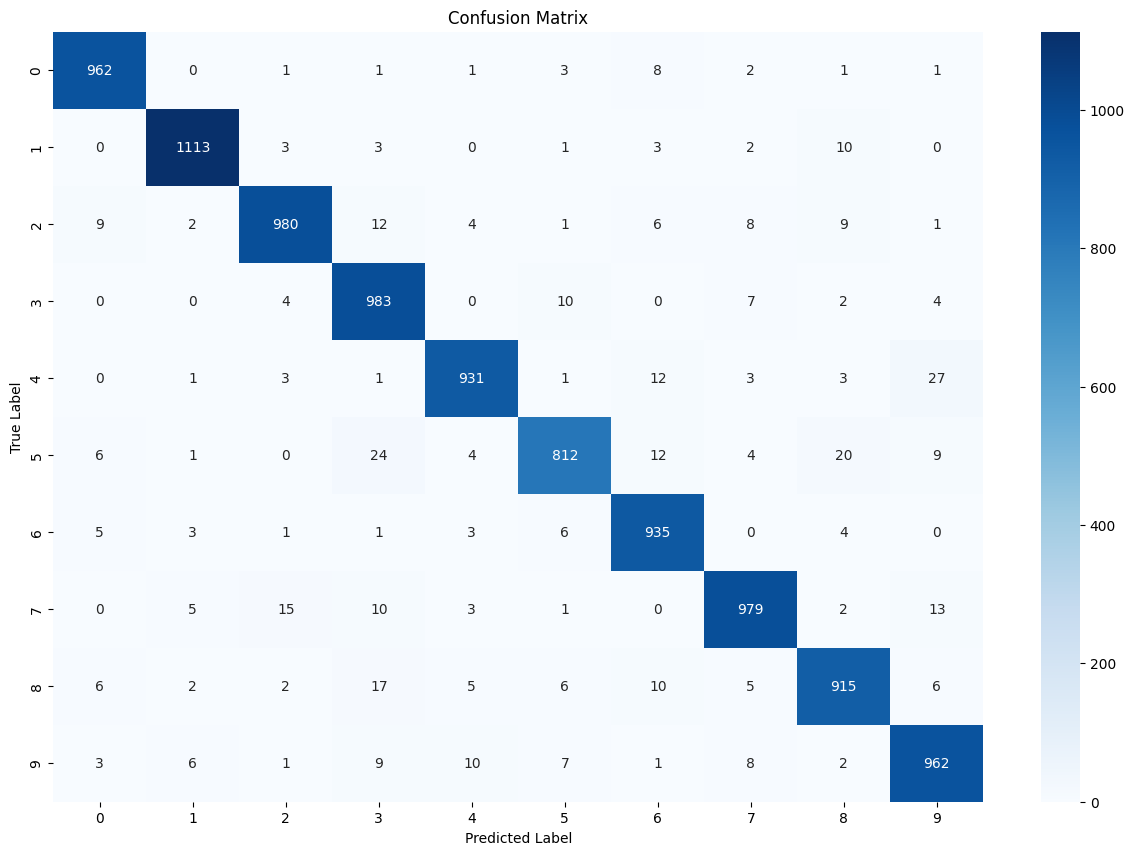

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predicted_labels = np.argmax(prediction, axis=1)

conf_mtrx = confusion_matrix(y_test,predicted_labels)

#plot
fig,ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(conf_mtrx, annot=True, fmt='d', ax=ax, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()